In [1]:
import geopandas as gpd
import json as json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np

In [2]:
df_parishes = pd.read_csv('../data/parishes.csv')
df_points = pd.read_csv('../data/points.csv') 
with open('../data/parish_shapefile.json', 'r') as f:
    shapes = json.load(f)

In [3]:
parishes = [x for x in df_parishes['parish']]
municipalities =  df_parishes['municipality'].unique()

In [4]:
shapes_porto = shapes
# in_porto = [shapes['features'][x]['properties']['name_3'] in df_parishes['parish'].values for x in range(0,len(shapes['features']))]
parish_index = dict(zip([shapes['features'][x]['properties']['name_3'] for x in range(0,len(shapes['features']))],range(0,len(shapes['features']))))

In [5]:
# Filter population df
df_parish_population

NameError: name 'df_parish_population' is not defined

In [ ]:
parishes_map = [
    'Paranhos',
    'Ramalde',
    'Cedofeita',
    'Miragaia',
    'Santo Ildefonso',
    'São Nicolau',
    'Sé',
    'Vitória',
    'Campanhã',
    'Aldoar',
    'Foz Do Douro',
    'Nevogilde',
    'Lordelo Do Ouro',
    'Massarelos',
    'Bonfim',
    'São Mamede De Infesta',
    'Senhora Da Hora',
    'Leça Da Palmeira',
    'Matosinhos',
    'Custóias',
    'Guifões',
    'Leça Do Balio',
    'Rio Tinto',
    'Mafamude',
    'Vilar Do Paraíso',
    'São Pedro Da Afurada',
    'Vila Nova De Gaia (Santa Marinha)',
    'Canidelo',
    'Oliveira Do Douro',
    'Madalena',
    'Pedrouços',
    'Ermesinde',
    'Gueifães',
    'Maia',
    'Vermoim',
    'Águas Santas',
    'Baguim Do Monte (Rio Tinto)',
    'Vilar de Andorinho',
    ##
    'Arcozelo',
    'Vilar De Andorinho',
    'Gulpilhares',
    'Valadares',
    'Gondomar (São Cosme)',
    'Jovim',
    'Valbom'
#     'Gulpilhares',
#     'Valadares'
]

In [244]:
# Filter shapes to Porto
features_porto = []
for feature in shapes['features']:
    if feature['properties']['name_2'] in municipalities and feature['properties']['name_3'] in parishes_map:
        features_porto.append(feature)
shapes_porto = shapes
shapes_porto['features'] = features_porto

In [245]:
shapes_porto_gpd = gpd.GeoDataFrame.from_features(features_porto)

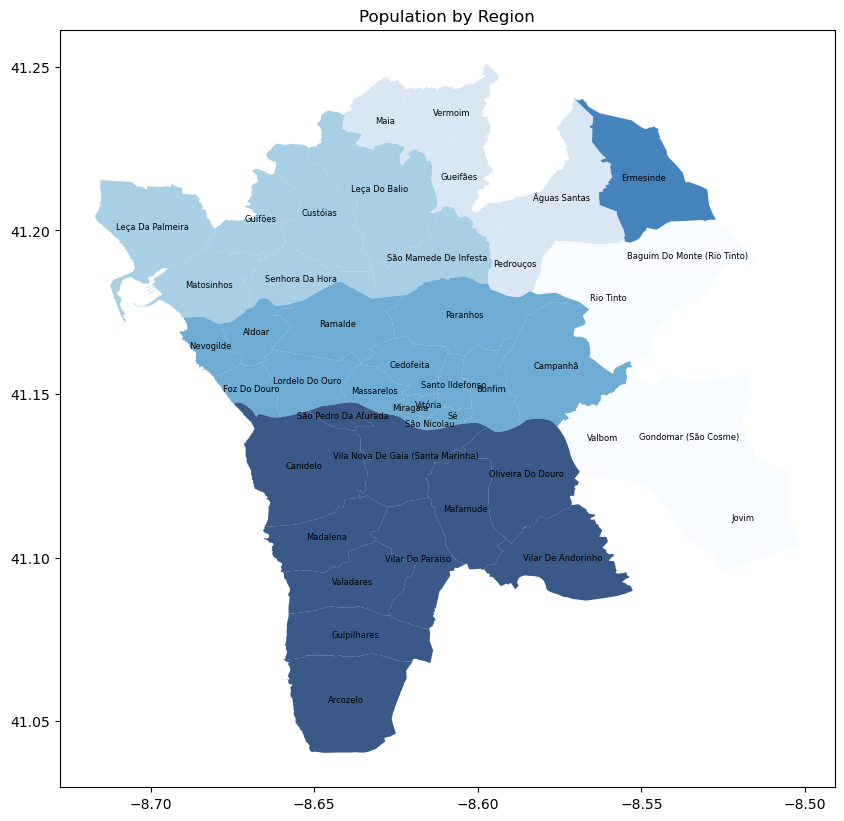

In [246]:
fig, ax = plt.subplots(figsize=(10, 10))
shapes_porto_gpd.plot(ax=ax, column='name_2', cmap='Blues', alpha=0.8)
for idx, row in shapes_porto_gpd.iterrows():
    label = row['name_3']
    ax.annotate(label, xy=row['geometry'].centroid.coords[0], ha='center', va='center', size=6)
ax.set_title('Population by Region')
plt.show()


In [247]:
# df_filter = df_parish_population[[len(x)==4 for x in df_parish_population['code2']]]
# df_filter = df_filter[[x in ['Gondomar','Maia','Matosinhos','Porto','Valongo','Vila Nova de Gaia'] for x in df_filter['name']]]
# df_filter = df_filter[(df_filter['age'] == 'Total') & (df_filter['gender'] == 'HM') & (df_filter['year'] == 2021)]
# municipality_codes = df_filter['code2'].unique()

In [248]:
# df_porto = df_parish_population[[x[0:4] in municipality_codes and len(x)>4 for x in df_parish_population['code2']]]
# df_porto = df_porto[(df_porto['age'] == 'Total') & (df_porto['gender'] == 'HM') & (df_porto['year'] == 2021)]
# df_porto.sort_values(by=['code2']).to_csv('aux.csv')

In [249]:
shapes_porto_gpd[shapes_porto_gpd['name_3'] == 'Paranhos']

,geometry,id_0,iso,name_0,id_1,name_1,id_2,name_2,id_3,name_3,ccn_3,cca_3,type_3,engtype_3,nl_name_3,varname_3
29,"MULTIPOLYGON (((-8.60922 41.16246, -8.60892 41...",182,PRT,Portugal,15,Porto,219,Porto,2959,Paranhos,0,None,Parish,Parish,None,None


In [250]:
df_points['lat'].values

array([41.14602144, 41.14484406, 41.15781569, 41.15879874, 41.14566193,
       41.15751037, 41.14872896, 41.16118584, 41.16602656, 41.17581286,
       41.17681086, 41.16704354, 41.18874089, 41.19446895, 41.18531111,
       41.18540055, 41.18414638, 41.16881425, 41.1729231 , 41.18896793,
       41.10102964, 41.09373639, 41.11464934, 41.11918183, 41.15015752,
       41.15393054, 41.15342878, 41.15412405, 41.20795945, 41.20870981,
       41.22732942, 41.22293333, 41.13520053, 41.12899469, 41.12536051,
       41.14119333, 41.15222252, 41.15647924, 41.16769968, 41.17018233,
       41.1930137 , 41.18510639, 41.18551191, 41.19550753, 41.0488996 ,
       41.06306687, 41.06330781, 41.04911482, 41.19727725, 41.18088117,
       41.18954779, 41.20670116, 41.23367754, 41.23509226, 41.21667753,
       41.23616034, 41.15080821, 41.16631706, 41.16787069, 41.15235953,
       41.20537648, 41.20353227, 41.20411383, 41.22414173, 41.13421996,
       41.12081391, 41.12008981, 41.13630074, 41.13299905, 41.13

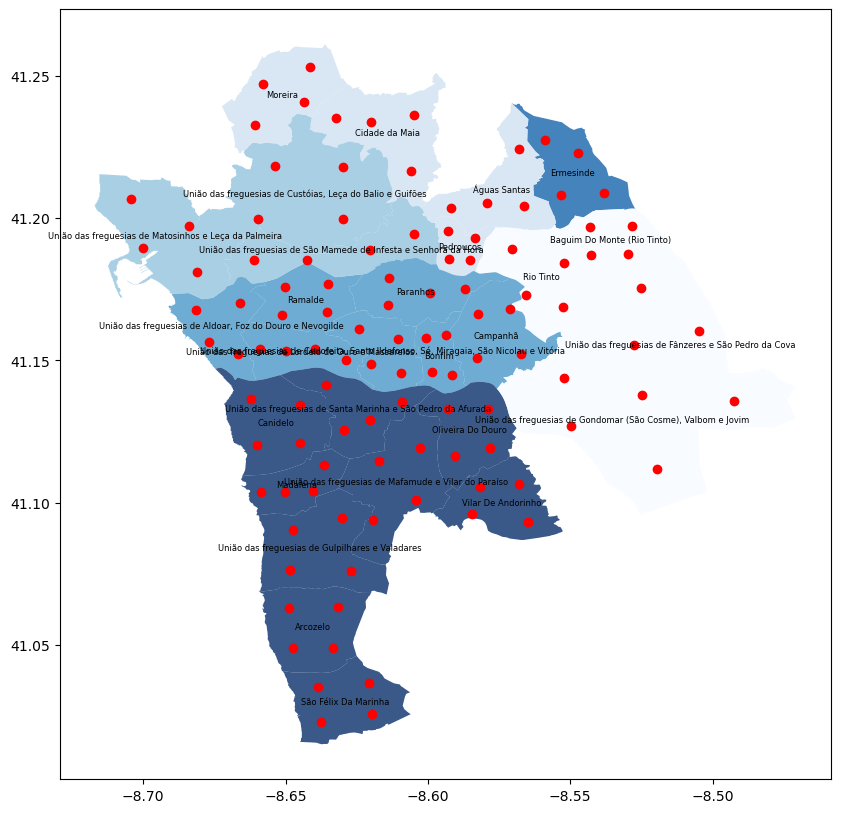

In [253]:
# Read the shapefile into a
with open('../data/parish_shapefile_merged.json', 'r') as f:
    shapes_merged = json.load(f)
shapes_merged_gpd = gpd.GeoDataFrame.from_features(shapes_merged['features'])
    
fig, ax = plt.subplots(figsize=(10, 10))

# Set the background color of the plot to black
# ax.set_facecolor('black')

shapes_merged_gpd.plot(ax=ax, column='name_2', cmap='Blues', alpha=0.8)

for idx, row in shapes_merged_gpd.iterrows():
    label = row['name_3']
    ax.annotate(label, xy=row['geometry'].centroid.coords[0], ha='center', va='center', size=6, color='black')

# ax.set_title('Population by Region', color='white')
# ax.title.set_color('white')


# # Plot the points
# ax.scatter(x_points, y_points, color='red', s=10)
# for idx, row in shapes_merged_gpd.iterrows():
#     label = row['name_3']
#     ax.annotate(label, xy=row['geometry'].centroid.coords[0], ha='center', va='center', size=6, color='white')

ax.scatter(df_points['long'], df_points['lat'], c='red')

plt.savefig('points.png', dpi=300)
plt.show()


In [252]:
municipalities

array(['Porto', 'Matosinhos', 'Gondomar', 'Vila Nova de Gaia', 'Valongo',
       'Maia'], dtype=object)

In [255]:
import geopandas as gpd
gdf = gpd.read_file('../data/parish_shapefile.json')
# gdf.to_file('parish_shapefile_merged.shp', driver='ESRI Shapefile')

In [275]:
keep = ['Bonfim','Cedofeita','Miragaia','Santo Ildefonso','São Nicolau','Sé','Vitória','Ramalde','São Mamede De Infesta','Senhora Da Hora','Rio Tinto','Mafamude','Vilar Do Paraíso','Lordelo Do Ouro','Massarelos','Ermesinde','São Pedro Da Afurada','Vila Nova De Gaia (Santa Marinha)','Aldoar','Foz Do Douro','Nevogilde','Pedrouços','Arcozelo','Leça Da Palmeira','Matosinhos','Gueifães','Maia','Vermoim','Campanhã','Águas Santas','Canidelo','Oliveira Do Douro','Baguim Do Monte (Rio Tinto)','Vilar De Andorinho','Custóias','Guifões','Leça Do Balio','Madalena','Paranhos','Gulpilhares','Valadares','Gondomar (São Cosme)','Jovim','Valbom','Fânzeres','São Pedro Da Cova','São Félix Da Marinha']


['Porto', 'Matosinhos', 'Gondomar', 'Vila Nova de Gaia', 'Valongo', 'Maia']

In [259]:
gdf= gpd.read_file('../data/parish_shapefile.json')

In [276]:
filtered_gdf = gdf[gdf['name_3'].isin(keep) & gdf['name_2'].isin([x for x in municipalities])]

In [277]:
filtered_gdf

,id,id_0,iso,name_0,id_1,name_1,id_2,name_2,id_3,name_3,ccn_3,cca_3,type_3,engtype_3,nl_name_3,varname_3,geometry
1598,jt394dz4777.2859,182,PRT,Portugal,15,Porto,214,Matosinhos,2859,Senhora Da Hora,0,None,Parish,Parish,None,None,"MULTIPOLYGON (((-8.62963 41.17949, -8.63196 41..."
1925,jt394dz4777.2955,182,PRT,Portugal,15,Porto,219,Porto,2955,Lordelo Do Ouro,0,None,Parish,Parish,None,None,"MULTIPOLYGON (((-8.64046 41.14734, -8.64097 41..."
1927,jt394dz4777.2956,182,PRT,Portugal,15,Porto,219,Porto,2956,Massarelos,0,None,Parish,Parish,None,None,"MULTIPOLYGON (((-8.62291 41.14936, -8.62266 41..."
1980,jt394dz4777.2957,182,PRT,Portugal,15,Porto,219,Porto,2957,Miragaia,0,None,Parish,Parish,None,None,"MULTIPOLYGON (((-8.61750 41.14310, -8.61731 41..."
1995,jt394dz4777.2962,182,PRT,Portugal,15,Porto,219,Porto,2962,Sé,0,None,Parish,Parish,None,None,"MULTIPOLYGON (((-8.60392 41.14095, -8.60590 41..."
2133,jt394dz4777.2814,182,PRT,Portugal,15,Porto,212,Maia,2814,Pedrouços,0,None,Parish,Parish,None,None,"MULTIPOLYGON (((-8.57311 41.19675, -8.57362 41..."
2308,jt394dz4777.2963,182,PRT,Portugal,15,Porto,219,Porto,2963,Santo Ildefonso,0,None,Parish,Parish,None,None,"MULTIPOLYGON (((-8.60185 41.14567, -8.60317 41..."
2311,jt394dz4777.2964,182,PRT,Portugal,15,Porto,219,Porto,2964,Vitória,0,None,Parish,Parish,None,None,"MULTIPOLYGON (((-8.61219 41.14600, -8.61222 41..."
2334,jt394dz4777.2765,182,PRT,Portugal,15,Porto,210,Gondomar,2765,Baguim Do Monte (Rio Tinto),0,None,Parish,Parish,None,None,"MULTIPOLYGON (((-8.53572 41.17837, -8.53802 41..."
2375,jt394dz4777.2770,182,PRT,Portugal,15,Porto,210,Gondomar,2770,Jovim,0,None,Parish,Parish,None,None,"MULTIPOLYGON (((-8.50494 41.12646, -8.50494 41..."


In [278]:
print([x for x in filtered_gdf['id_3']])

[2859, 2955, 2956, 2957, 2962, 2814, 2963, 2964, 2765, 2770, 2775, 2776, 2767, 2769, 2774, 2802, 2809, 2810, 2817, 2850, 2851, 2853, 2854, 2855, 2857, 2950, 2951, 2952, 2953, 2954, 2958, 2959, 2960, 2961, 2999, 3032, 3035, 3038, 3040, 3041, 3043, 3046, 3047, 3052, 3053, 3054, 3055]
